In [1]:
from astropy.io import fits
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pyarrow.parquet as parquet
import fast_histogram as fh
import time


In [6]:
aspect = parquet.read_table('/home/bekah/gPhoton2/gPhoton/aspect/metadata.parquet', filters=[('legs','>=',1)]).to_pandas()
aspect

,eclipse,obstype,legs,ra_max,ra_min,dec_max,dec_min,fuv_temp
0,755,AIS,6,222.754195,219.628170,3.668738,2.001110,29.936751
1,759,AIS,6,223.809305,223.243465,2.029690,1.183272,29.937695
2,769,AIS,6,217.598983,213.348209,7.827435,6.977091,29.940205
3,775,AIS,6,221.256752,219.129942,5.319637,4.469436,27.991805
4,798,AIS,6,219.085369,214.972308,2.931911,1.164427,28.848030
...,...,...,...,...,...,...,...,...
9394,46820,AIS,12,195.187914,191.625327,-39.246636,-45.110221,NaN
9395,46830,AIS,12,186.618407,181.112356,-33.157878,-37.012271,NaN
9396,46831,AIS,12,124.541953,120.202757,-12.615933,-17.350079,NaN
9397,46833,AIS,12,194.500695,193.140921,-54.210055,-57.942400,NaN


In [7]:
dispersion = aspect.groupby(['eclipse']).agg({
    'ra': 'std',
    'dec': 'std',
    'time': 'count',
    'flags':'mean'
}).reset_index()

In [ ]:
dispersion

In [ ]:
dispersion['combo'] = dispersion['ra']+dispersion['dec']

In [ ]:
plt.scatter(dispersion['time'],dispersion['combo'],c=dispersion['flags'],s=.05)
plt.ylim(0,10)

In [ ]:
plt.hist(dispersion['flags'],bins=100)

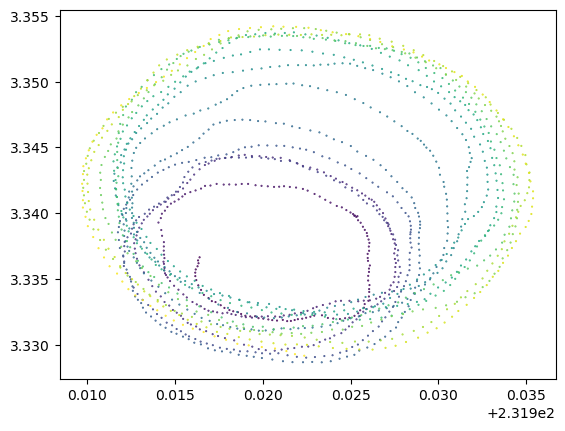

In [8]:
plt.scatter(aspect['ra'],aspect['dec'],c=aspect['time'],s=.25)

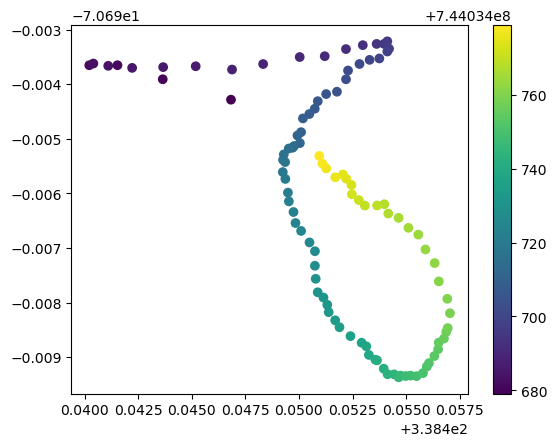

In [5]:
plt.scatter(aspect['ra'][119:220],aspect['dec'][119:220],c=aspect['time'][119:220])
plt.colorbar()

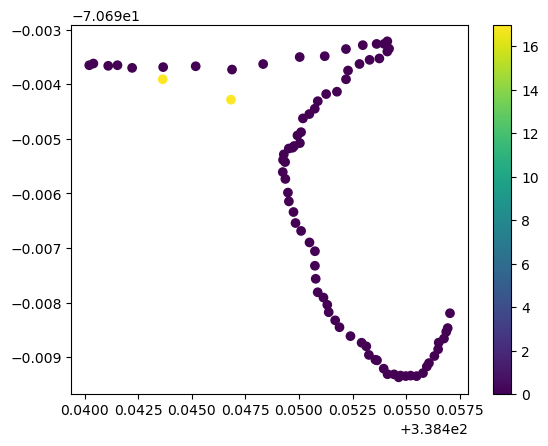

In [7]:
plt.scatter(aspect['ra'][119:200],aspect['dec'][119:200],c=aspect['flags'][119:200])
plt.colorbar()

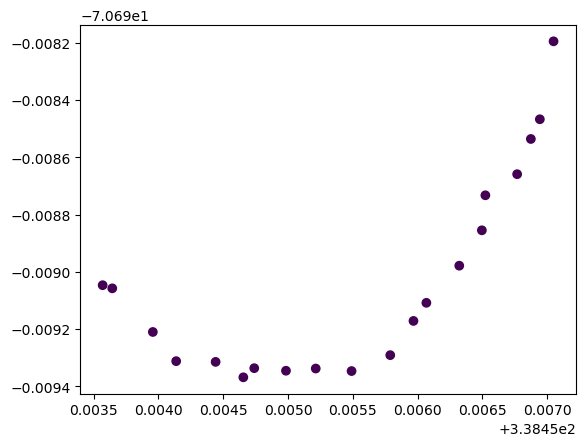

In [15]:
plt.scatter(aspect['ra'][180:200],aspect['dec'][180:200],c=aspect['flags'][180:200])

In [9]:
np.std(aspect['ra'])

0.007167940880750592

In [10]:
np.std(aspect['dec'])

0.007263403402072753

In [13]:
np.std(aspect['dec'])

0.007270451695883139

In [14]:
np.std(aspect['ra'])

0.007182692420367891